<a href="https://colab.research.google.com/github/bhoomika297/Langchain-projects/blob/main/Multi%20AI%20agent%20RAG%20with%20langgraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langchain cassio langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 756.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.9/18.9 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.5/288.5 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfull

In [2]:
import cassio
##connection of the Astra DB

ASTRA_DB_APPLICATION_TOKEN = "AstraCS:FhhNDEyQkYXnWHjSKFEABceF:06a0d676981c85812f650dc4f86e4019993ee7951d0313225a3cfc52748e0fd1"
ASTRA_DB_ID = "039a2b5e-ee7f-4c0f-b6d3-6935d051de26"
cassio.init(token=ASTRA_DB_APPLICATION_TOKEN,database_id=ASTRA_DB_ID)

ERROR:cassandra.connection:Closing connection <LibevConnection(134040494364016) 039a2b5e-ee7f-4c0f-b6d3-6935d051de26-us-east1.db.astra.datastax.com:29042:1f192653-49bf-454b-a28d-bc8fd3bd2c63> due to protocol error: Error from server: code=000a [Protocol error] message="Beta version of the protocol used (5/v5-beta), but USE_BETA flag is unset"


In [3]:
!pip install -U tiktoken langchain-groq langchainhub langchain_community langchain_huggingface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.4 MB/s eta 0:00:00


In [4]:

from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader

urls=[
  "https://www.techtarget.com/searchenterpriseai/definition/generative-AI",
  "https://medium.com/the-modern-scientist/detailed-explanations-of-transformer-step-by-step-dc32d90b3a98",
  "https://mitsloan.mit.edu/ideas-made-to-matter/machine-learning-explained"
]

##load url
docs = [WebBaseLoader(url).load() for url in urls]
doc_list=[item for sublist in docs for item in sublist]
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=500,chunk_overlap=0)
docs_split = text_splitter.split_documents(doc_list)

In [5]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="all-MiniLm-L6-v2")

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [6]:
from langchain.vectorstores.cassandra import Cassandra
astra_vector_store = Cassandra(embedding=embeddings,
                               table_name="qa_mini_demo",
                               session=None,
                               keyspace=None)

In [7]:
from langchain.indexes.vectorstore import VectorStoreIndexWrapper
astra_vector_store.add_documents(docs_split)
print("Inserted %i headlines." % len(docs_split))
astra_vector_index = VectorStoreIndexWrapper(vectorstore=astra_vector_store)

Inserted 45 headlines.


In [8]:
retriever = astra_vector_store.as_retriever()
retriever.invoke("What is transformer")

[Document(metadata={'description': 'Prior to the advent of the Transformer, the bag of words method is a commonly used approach in Natural Language Processing (NLP), treating each word or token as an independent entity in the context…', 'language': 'en', 'source': 'https://medium.com/the-modern-scientist/detailed-explanations-of-transformer-step-by-step-dc32d90b3a98', 'title': 'Step-by-Step Illustrated Explanations of Transformer | by Yule Wang, PhD | The Modern Scientist | Medium'}, page_content='Step-by-Step Illustrated Explanations of Transformer | by Yule Wang, PhD | The Modern Scientist | MediumOpen in appSign upSign inWriteSign upSign inStep-by-Step Illustrated Explanations of TransformerYule Wang, PhD·FollowPublished inThe Modern Scientist·8 min read·Feb 27, 2023--3ListenShareMy next post “An In-Depth Look at Transformer-Based Models” will deeply explore the training objectives and architectures of these models, including why GPT-1 to GPT-4 utilize a Transformer decoder-only arc

In [9]:
pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=0e80dc4ae74b1c212ee58df9078ccb0c241492ea8000993e8856b0dea929e0cd
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [10]:
from langchain_community.utilities import WikipediaAPIWrapper
from langchain_community.tools import WikipediaQueryRun

api_wrapper = WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki = WikipediaQueryRun(api_wrapper=api_wrapper)

In [11]:
wiki.run("Who is Subhas Chandra Bose")

"Page: Statue of Subhas Chandra Bose\nSummary: Statue of Subhas Chandra Bose, also known as the Netaji's Statue, is a monolithic statue made of black granite, dedicated to Netaji Subhas Chandra Bose, Indian freedom fighter and Commander-in-Chief of Indian National Army. The statue 28 feet (8.5 m) in total height, including a 8 feet (2.4 m) in total width. It is placed under the canopy behind India Gate in Delhi. The statue was sculpted by Mysuru-based sculptor Arun Yogiraj, whose other prominent w"

In [12]:
## ADDING GOOGLE SEARCH TOOL

In [13]:
%pip install --upgrade --quiet  langchain_google_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 1.1 MB/s eta 0:00:00


In [14]:
import os
from google.colab import userdata

os.environ["GOOGLE_CSE_ID"] = userdata.get("GOOGLE_CSE_ID")
os.environ["GOOGLE_API_KEY"] = userdata.get("GOOGLE_SEARCH_API")

In [15]:
from langchain_core.tools import Tool
from langchain_google_community import GoogleSearchAPIWrapper

search = GoogleSearchAPIWrapper()

google_tool = Tool(
    name="google_search",
    description="Search Google for recent results.",
    func=search.run,
)

In [16]:
google_tool.run("how BJP win 2024 prime minister election ")

"Lok Sabha Election 2024: PM Modi takes 'INDI earns commission' jibe at opposition alliance. 8 hours ago. more_vert. India Today. PM Modi holds mega roadshow in\xa0... Headlines · Himanta Sarma Says Congress Manifesto Is For Polls In Pak, Party Responds · Lok Sabha Election 2024: PM Modi takes 'INDI earns commission' jibe at\xa0... TMC sought voting, Congress for consensus on Speaker election ... BJP shares clip of PM Modi predicting Congress would reinstate Sam Pitroda: 'As Prime Minister\xa0... Dec 11, 2018 ... Prime Minister Narendra and his right-wing BJP party appear to be facing difficulties in the elections. The opposing party, the Congress Party\xa0..."

In [36]:
## Langgraph Application

from typing import Literal
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field

In [47]:
class RouteQuery(BaseModel):
  """Route a user query to the relevant datasource."""
  datasource: Literal["vectorstore","wiki_search","google_search"] = Field(
      ...,
      description="Given a user question choose to route it to wikipedia or a vectorstore or a google_search.",)

In [48]:
from langchain_groq import ChatGroq
from google.colab import userdata
import os
groq_api_key = userdata.get('GROQ_API_KEY')
print(groq_api_key)

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


In [49]:
llm = ChatGroq(groq_api_key=groq_api_key,model_name="Llama-3.1-70b-versatile")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x79e78646a6b0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x79e7864698d0>, model_name='Llama-3.1-70b-versatile', groq_api_key=SecretStr('**********'))

In [50]:
structured_llm_router = llm.with_structured_output(RouteQuery)

In [51]:
#Prompt

system = """You are expert at routing a user question to a vectorstore or wikipedia.
         The vectorstore contains documents related to generative ai, transformer, and machine learning.
         Use the vectorstore for question on these topics. Otherwise, use wiki-search or google-search"""
route_prompt = ChatPromptTemplate.from_messages(
    [("system",system),
    ("human","{question}"),
    ]
)

In [52]:
question_router = route_prompt|structured_llm_router

In [53]:
print(question_router.invoke({
    "question":"what is transformer"
}))

datasource='vectorstore'


In [54]:
print(question_router.invoke({
    "question":"where is taj mahel"
}))

datasource='wiki_search'


In [57]:
print(question_router.invoke({
    "question":"3+2"
}))

datasource='google_search'


In [58]:
## AI Agent Application Using Langgraph

from typing import List
from typing_extensions import TypedDict

class GraphState(TypedDict):
  """Represents the state of the graph
  Attributes:
  question: question
  generation: LLM generation
  documents: list of documents
  """

  question: str
  generation: str
  documents: List[str]

In [59]:
from langchain.schema import Document

def retrieve(state):
     """
         Retrieve documents

         Args:
             state (dict): the current graph state

         Returns:
          state (dict): New key added to state, documents, that contains retrieved documents
     """
     print("----Retriever----")
     questions = state["question"]

     ## Retrieval
     documents = retriever.invoke(questions)
     return {"documents":documents, "question":questions}

In [60]:
def wiki_search(state):
  """
  wiki search based on the re-phrased question.
  Args:
  state (dict): The current graph state

  Returns:
  state (dict): Updates documents key with appended web results

  """
  print("---wikipedia---")
  #print("---Hello---")
  question = state["question"]
  print(question)

  #wiki search
  docs = wiki.invoke({"query": question})
  #print(docs["summary"])
  wiki_results = docs
  wiki_results = Document(page_content=wiki_results)

  return {"documents": wiki_results,"question": question}

In [61]:
def google_search(state):
  """
  google search based on the re-phrased question.
  Args:
  state (dict): The current graph state

  Returns:
  state (dict): Updates documents key with appended web results

  """
  print("---Google Search---")
  #print("---Hello---")
  question = state["question"]
  print(question)

  #wiki search
  docs = google_tool.invoke({"query": question})
  #print(docs["summary"])
  google_results = docs
  google_results = Document(page_content=google_results)

  return {"documents": google_results,"question": question}

In [62]:
## Edges ##

def route_question(state):
  """
  Route Question to wiki search or RAG.

  ARGs:
  state (dict): The current graph state

  Returns:
  str: Next node to call
  """

  print("---ROUTE QUESTION---")
  question = state["question"]
  source = question_router.invoke({"question":question})
  if source.datasource == "wiki_search":
    print("---ROUTE QUESTION TO WIKI SEARCH---")
    return "wiki_search"
  elif source.datasource == "vectorstore":
    print("----ROUTE QUESTION TO RAG----")
    return "vectorstore"
  elif source.datasource == "google_search":
    print("----ROUTE QUESTION TO GOOGLE SEARCH----")
    return "google_search"

In [63]:
from langgraph.graph import END, StateGraph,START

workflow = StateGraph(GraphState)
## Define the nodes
workflow.add_node("wiki_search",wiki_search)
workflow.add_node("retrieve",retrieve)
workflow.add_node("google_search",google_search)

## build the graph
workflow.add_conditional_edges(
    START,
    route_question,{
        "wiki_search":"wiki_search",
        "vectorstore":"retrieve",
        "google_search":"google_search",
    },
)

workflow.add_edge("retrieve",END)
workflow.add_edge("wiki_search",END)
workflow.add_edge("google_search",END)


## compile
app = workflow.compile()

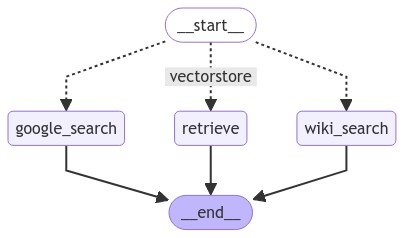

In [64]:
from IPython.display import Image, display

try:
  display(Image(app.get_graph().draw_mermaid_png()))

except Exception:
  #This require some extra dependencies and is optional
  print("error")

In [71]:
from pprint import pprint
inputs = {
    "question": "full form of IOT"
}
for output in app.stream(inputs):
  for key, value in output.items():
    pprint(f"Node '{key}':")

  print("\n------\n")

pprint(value['documents'])


---ROUTE QUESTION---
---ROUTE QUESTION TO WIKI SEARCH---
---wikipedia---
full form of IOT
"Node 'wiki_search':"

------

Document(page_content='Page: Internet of things\nSummary: Internet of things (IoT) describes devices with sensors, processing ability, software and other technologies that connect and exchange data with other devices and systems over the Internet or other communication networks. The Internet of things encompasses electronics, communication, and computer science engineering. "Internet of things" has been considered a misnomer because devices do not need to be connected to the public internet; they only need to be connec')
